In [131]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

RES_PATH = "snap/gqa/gcp_val/"
EXP_NAME = "full_nsp_mlm_ft_joint_results/"
IMG_PATH = "data/gqa/images/images/"

QUESTIONS_FILE = "data/gqa/valid_all.json"

questions = json.load(open(QUESTIONS_FILE))
answers = json.load(open(RES_PATH + EXP_NAME + "valid_all_predict_LAST.json"))


[{'prediction': 'yes', 'questionId': '05451384'}]

[{'img_id': '2382986',
  'label': {'no': 1.0},
  'question_id': '05451384',
  'sent': 'Are there blankets under the brown cat?'}]

190.44424460431654 ... 1255 ... 1
[389, 194, 304, 183, 115, 508, 55, 344, 264, 407]


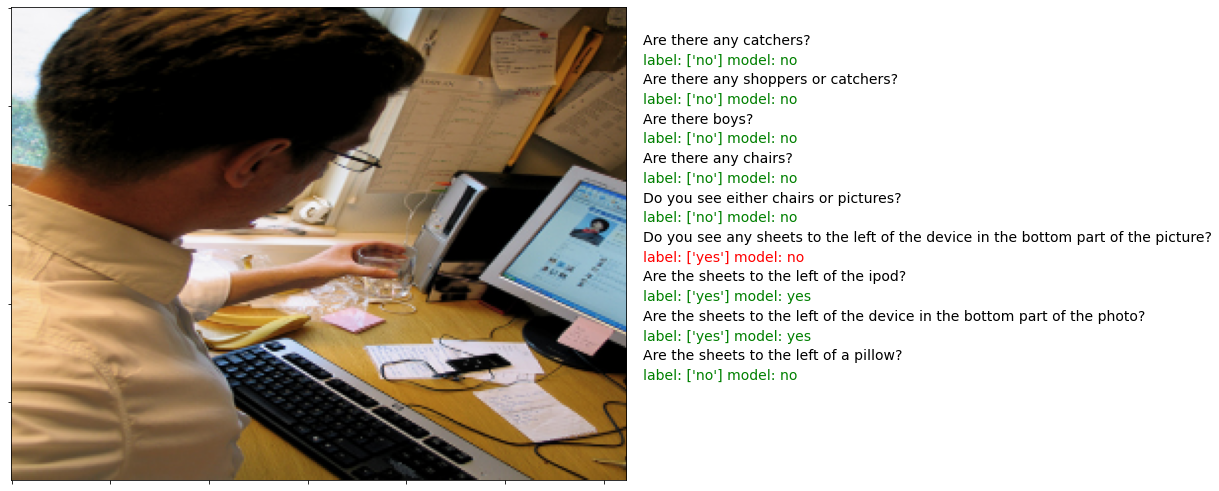

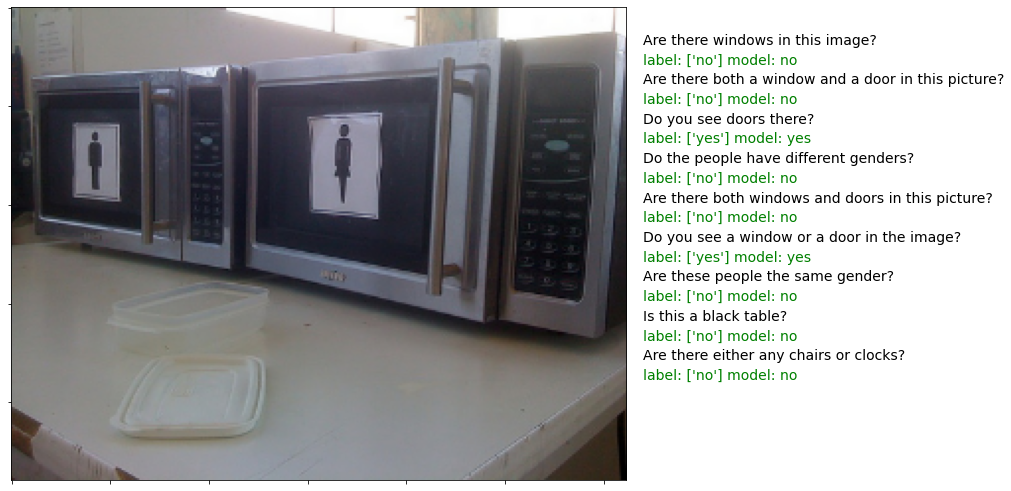

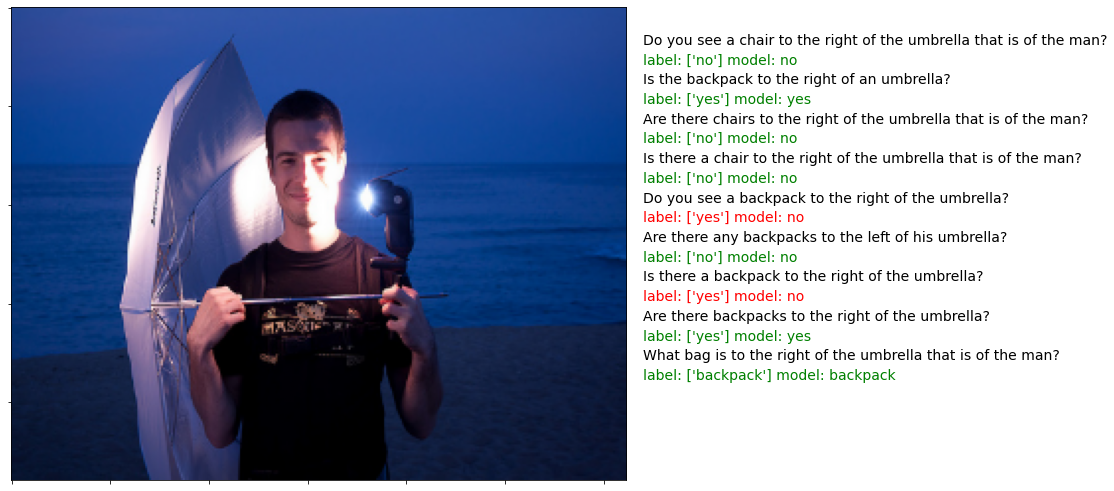

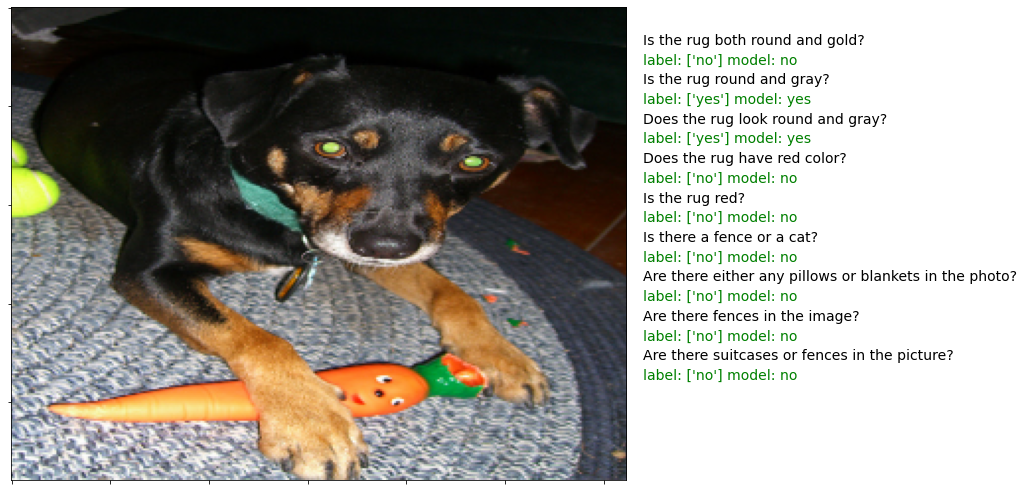

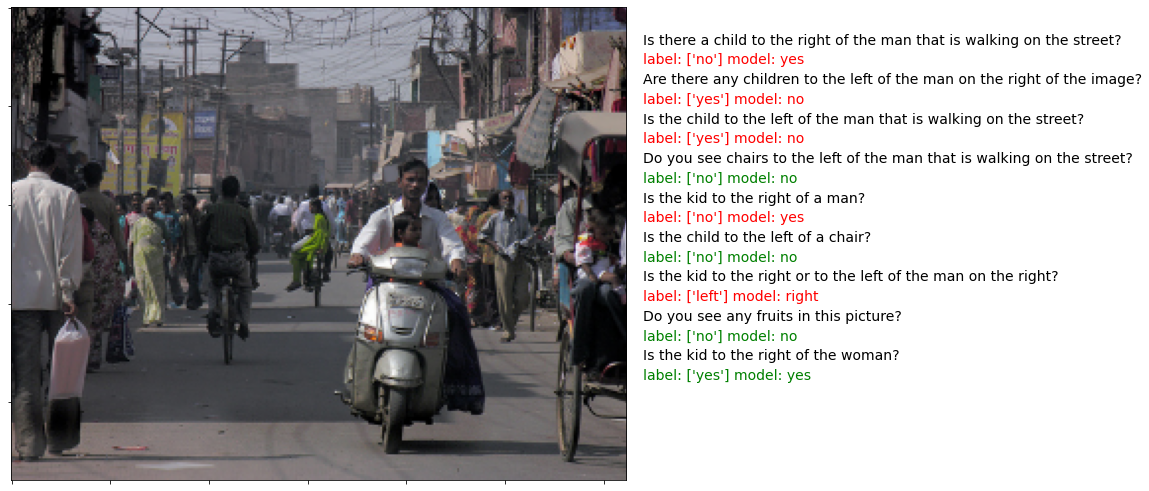

In [133]:
import random
from collections import namedtuple
from skimage.transform import resize

Question = namedtuple('Question', ['question_id', 'sent', 'label', 'model'])

random.seed(8)
answers[:1]
questions[:1]

ctr = 0
img_ques_dict = {}
# map all questions to images
for ques, ans in zip(questions, answers):
  assert ques['question_id'] == ans['questionId']
  img_key = ques['img_id'] 
  img_ques_dict[img_key] = img_ques_dict.get(img_key, [])
  img_ques_dict[img_key].append(Question(ques['question_id'], ques['sent'], list(ques['label'].keys()), ans['prediction']))

# compute question to img relation stats
q_nums = []
for k,v in img_ques_dict.items():
  q_nums += [len(v)]
print(f"{sum(q_nums)/len(q_nums)} ... {max(q_nums)} ... {min(q_nums)}")
print(q_nums[:10])

idxs  = random.sample(range(len(img_ques_dict)), 5)
img_keys = list(img_ques_dict.keys())
for i, idx in enumerate(idxs):
  _ = plt.figure(figsize=(64, 64))

  img = mpimg.imread(IMG_PATH + img_keys[idx] + ".jpg")
  img = resize(img, (240,312))
  ax = plt.subplot(1,5,i+1)
  _=plt.imshow(img)
  _=ax.set_yticklabels([])
  _=ax.set_xticklabels([])
  ques_list = img_ques_dict[img_keys[idx]]
  for q_id, ques in zip(range(1,10), ques_list):  
    off = 20*q_id
    _ = ax.text(320, off, ques.sent, wrap=True, verticalalignment='bottom', fontsize=14)
    ques_str = 'label: ' + str(ques.label)
    ques_str += ' model: ' + ques.model   
    if ques.label[0] == ques.model:
      color = 'green'
    else:
      color = 'red'
    _ = ax.text(320, off+10, ques_str, wrap=True, verticalalignment='bottom', fontsize=14, color=color)

# assert len(questions) == len(answers)   
# for ques, answ in zip(questions, answers):
#   

  

# img = IMG_PATH + ques['img_id']
# img = mpimg.imread(IMG_PATH + ques['img_id'] + ".jpg")
# imgplot = plt.imshow(img)